# Project Title :- Predicting the energy output of wind turbine based on weather condition

# Name :- Amratya Singh

# Data Collection

## Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import time

import matplotlib.pyplot as plt
%matplotlib inline

## Importing the Dataset

In [2]:
data = pd.read_csv('T1.csv')
data

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286
...,...,...,...,...,...
50525,31 12 2018 23:10,2963.980957,11.404030,3397.190793,80.502724
50526,31 12 2018 23:20,1684.353027,7.332648,1173.055771,84.062599
50527,31 12 2018 23:30,2201.106934,8.435358,1788.284755,84.742500
50528,31 12 2018 23:40,2515.694092,9.421366,2418.382503,84.297913


# Data Preprocessing

## Data Visualisation

In [3]:
data.shape

(50530, 5)

In [4]:
data.describe()

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
count,50530.000000,50530.000000,50530.000000,50530.000000
mean,1307.684332,7.557952,1492.175463,123.687559
std,1312.459242,4.227166,1368.018238,93.443736
min,-2.471405,0.000000,0.000000,0.000000
25%,50.677890,4.201395,161.328167,49.315437
50%,825.838074,7.104594,1063.776283,73.712978
75%,2482.507568,10.300020,2964.972462,201.696720
max,3618.732910,25.206011,3600.000000,359.997589


In [5]:
data.rename(columns={'Theoretical_Power_Curve (KWh)':'Power','LV ActivePower (kW)':'ActivePower',"Wind Speed (m/s)":"WindSpeed","Wind Direction (°)":"WindDirection"},
                inplace=True)
data.head()

,Date/Time,ActivePower,WindSpeed,Power,WindDirection
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


In [6]:
data['Time']=data['Date/Time'].apply(lambda x: time.strptime(x,"%d %m %Y %H:%M")[4])
data.head()

,Date/Time,ActivePower,WindSpeed,Power,WindDirection,Time
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904,0
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113,10
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789,20
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087,30
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286,40


In [7]:
temp=data['Time'][1:].values - data['Time'][0:-1].values
temp=np.array([0]+list(temp))

In [8]:
data['TimeDiff']=temp

In [9]:
data.tail()

,Date/Time,ActivePower,WindSpeed,Power,WindDirection,Time,TimeDiff
50525,31 12 2018 23:10,2963.980957,11.404030,3397.190793,80.502724,10,10
50526,31 12 2018 23:20,1684.353027,7.332648,1173.055771,84.062599,20,10
50527,31 12 2018 23:30,2201.106934,8.435358,1788.284755,84.742500,30,10
50528,31 12 2018 23:40,2515.694092,9.421366,2418.382503,84.297913,40,10
50529,31 12 2018 23:50,2820.466064,9.979332,2779.184096,82.274620,50,10


In [10]:
data['Gust']=np.array([0]+list(data['WindSpeed'][1:].values-data['WindSpeed'][:-1].values))
data.head()

,Date/Time,ActivePower,WindSpeed,Power,WindDirection,Time,TimeDiff,Gust
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904,0,0,0.000000
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113,10,10,0.360831
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789,20,10,-0.456130
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087,30,10,0.443637
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286,40,10,-0.081733


In [11]:
data.dtypes

Date/Time         object
ActivePower      float64
WindSpeed        float64
Power            float64
WindDirection    float64
Time               int64
TimeDiff           int64
Gust             float64
dtype: object

In [12]:
data_=data[data['TimeDiff'].isin([10,-50])]
data_.head()

,Date/Time,ActivePower,WindSpeed,Power,WindDirection,Time,TimeDiff,Gust
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113,10,10,0.360831
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789,20,10,-0.456130
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087,30,10,0.443637
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286,40,10,-0.081733
5,01 01 2018 00:50,402.391998,5.604052,499.436385,264.578613,50,10,0.026111


In [13]:
len(data_)

50500

In [14]:
data_=data_[data_['ActivePower']>=0]
data_.describe()


,ActivePower,WindSpeed,Power,WindDirection,Time,TimeDiff,Gust
count,50443.000000,50443.000000,50443.000000,50443.000000,50443.000000,50443.000000,50443.000000
mean,1309.932554,7.565593,1494.454238,123.716485,24.997125,-0.002181,0.001787
std,1312.471586,4.226063,1367.906548,93.425141,17.078962,22.362852,0.742791
min,0.000000,0.000000,0.000000,0.000000,0.000000,-50.000000,-14.075440
25%,53.512621,4.212597,163.517562,49.344398,10.000000,10.000000,-0.380538
50%,828.896973,7.114135,1068.206544,73.689552,20.000000,10.000000,0.001451
75%,2485.947510,10.307985,2969.201056,201.697906,40.000000,10.000000,0.379923
max,3618.732910,25.206011,3600.000000,359.997589,50.000000,10.000000,17.411289


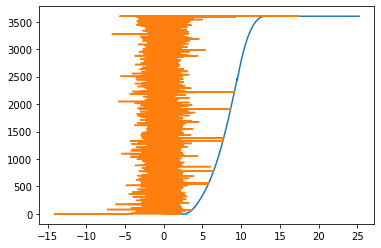

In [15]:
x=data_.sort_values(by='WindSpeed')['WindSpeed']
y=data_.sort_values(by='WindSpeed')['Power']
z=data_.sort_values(by='WindSpeed')['Gust']

plt.plot(x,y)
plt.plot(z,y)

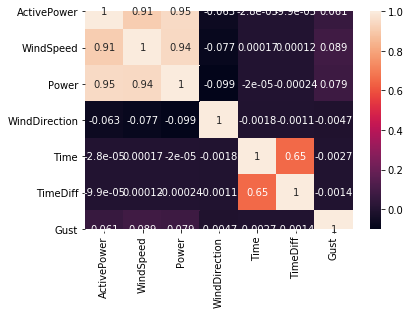

In [16]:
sns.heatmap(data.corr(),annot=True)

## Seperating the dependent and Independent values

In [17]:
x=data_[['WindSpeed','WindDirection','Gust']].values
y=data_['ActivePower'].values

In [18]:
x

array([[  5.67216682, 268.64111328,   0.36083078],
       [  5.2160368 , 272.56478882,  -0.45613003],
       [  5.65967417, 271.25808716,   0.44363737],
       ...,
       [  8.43535805,  84.74250031,   1.10271025],
       [  9.42136574,  84.2979126 ,   0.98600769],
       [  9.97933197,  82.27462006,   0.55796623]])

In [19]:
y

array([ 453.76919556,  306.37658691,  419.64590454, ..., 2201.10693359,
       2515.6940918 , 2820.46606445])

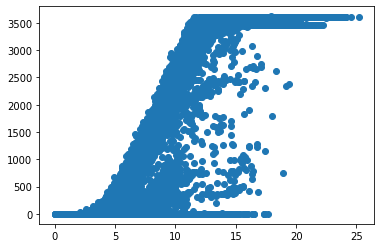

In [20]:
plt.scatter(x[:,0],y)

## splitting the data into training and testing

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [22]:
x_train.shape, x_test.shape

((35310, 3), (15133, 3))

In [23]:
data.head()

,Date/Time,ActivePower,WindSpeed,Power,WindDirection,Time,TimeDiff,Gust
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904,0,0,0.000000
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113,10,10,0.360831
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789,20,10,-0.456130
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087,30,10,0.443637
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286,40,10,-0.081733


# Model Building

## Training and Testing the model

applying random forest regression model

In [24]:
# from sklearn.linear_model import LinearRegression
# LR = LinearRegression()
# LR.fit(x_train, y_train)

# from sklearn.tree import DecisionTreeRegressor
# LR=DecisionTreeRegressor(criterion='mse',random_state=0)
# LR.fit(x_train,y_train)

from sklearn.ensemble import RandomForestRegressor
LR = RandomForestRegressor(n_estimators=10,criterion='mse',random_state=0)
LR.fit(x_train,y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [25]:
y_pred = LR.predict(x_test)
y_pred
y_test

array([ 750.77630615, 3600.3190918 , 1789.09899902, ...,    0.        ,
        349.1427002 ,  119.25589752])

## Evaluation

In [327]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9007532690078577

In [26]:
LR.predict([[6.8,275,0.5]])

array([735.75931396])

Therefore our model is rougly 90% accurate

In [27]:
import pickle
pickle.dump(LR,open("final.pkl",'wb'))

In [28]:
from joblib import dump
dump(LR,"final.save")

['final.save']